# Decorator function
1. Decorators modify the behaviour of functions
2. Input can be any function in general
3. Output function is called as wrapper

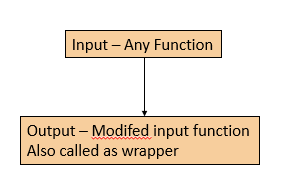

In [2]:
def welcome(func):

    def wrapper(*args, **kwargs):
        print("Welcome user!")
        r = func(*args, **kwargs)
        print(f"Function Result : {r}")
        print("Thank You")
        return r
    
    return wrapper

### Applying decorator on any function

In [3]:
@welcome
def hypotenuse(a, b):
    h = (a**2 + b**2)**(1/2)
    return h

In [4]:
# Input as args
h1 = hypotenuse(3, 4)

Welcome user!
Function Result : 5.0
Thank You


In [5]:
h1

5.0

In [6]:
# kwargs as input
h2 = hypotenuse(a=12.1, b=13.2)

Welcome user!
Function Result : 17.906702655709676
Thank You


In [7]:
h2

17.906702655709676

In [8]:
@welcome
def simple_intrest(p, n, r):
    i = (p*n*r)/100
    a = p + i
    return i, a

In [9]:
i1, a1 = simple_intrest(50_000, 4, 6.5)

Welcome user!
Function Result : (13000.0, 63000.0)
Thank You


In [10]:
i1

13000.0

In [11]:
a1

63000.0

In [12]:
i2, a2 = simple_intrest(p=73_000, n=5, r=7.1)

Welcome user!
Function Result : (25915.0, 98915.0)
Thank You


In [13]:
i2

25915.0

In [14]:
a2

98915.0

### Measure time required for any code to execute

In [15]:
import time

In [19]:
# Start the timer in seconds
start = time.perf_counter()

time.sleep(1.5)
print("Hello!")
time.sleep(2)
print("ETLHive")

# Stop the timer
stop = time.perf_counter()

# Get the elapsed time
elapsed = stop - start

print(f"Time required for execution : {elapsed:.2f} sec")

Hello!
ETLHive
Time required for execution : 3.51 sec


In [20]:
def time_decorator(func):

    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        r = func(*args, **kwargs)
        print(f"Results : {r}")
        stop = time.perf_counter()
        elapsed = stop - start
        print(f"Elapsed Time : {elapsed:.2f} sec")
        return r
        
    return wrapper

In [22]:
@time_decorator
def squares(n):
    time.sleep(3.2)
    return n**2

In [24]:
s1 = squares(12)

Results : 144
Elapsed Time : 3.20 sec


In [25]:
s2 = squares(n=1.8)

Results : 3.24
Elapsed Time : 3.20 sec


In [26]:
@time_decorator
def sum_squares(a: list[int|float]) -> int|float:
    # Initialzie sum to 0
    s = 0
    
    # apply for loop on list a
    for i in a:
        time.sleep(1)
        s = s + i**2

    # Return value of sum
    return s

In [27]:
b = [2, 3, 4, 5, 6, 7, 8.5]
type(b)

list

In [28]:
len(b)

7

In [29]:
sq1 = sum_squares(b)

Results : 211.25
Elapsed Time : 7.01 sec


In [30]:
c = [4, 5, 7]
sq2 = sum_squares(c)

Results : 90
Elapsed Time : 3.01 sec


### Check the time required to download file

In [31]:
url1 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv


In [32]:
url1.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'refs',
 'heads',
 'main',
 'artifacts',
 'data.csv']

In [33]:
url1.split("/")[-1]

'data.csv'

In [34]:
from urllib.request import urlretrieve

In [35]:
@time_decorator
def download_file(url: str):
    filename = url.split("/")[-1]
    print(f"{filename} download started ...")
    urlretrieve(url, filename)
    print(f"{filename} download complete")

In [36]:
url1

'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv'

In [37]:
download_file(url= url1)

data.csv download started ...
data.csv download complete
Results : None
Elapsed Time : 2.59 sec


In [38]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [39]:
df.shape

(193573, 11)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


### Get top3 most expensive diamonds

In [43]:
df.nlargest(n=3, columns="price")

,id,carat,cut,color,clarity,depth,table,x,y,z,price
693,693,2.01,Premium,G,SI1,62.0,58.0,8.10,8.04,5.00,18818
9224,9224,2.00,Very Good,G,SI1,63.5,56.0,8.03,7.97,5.05,18818
59270,59270,2.29,Premium,G,SI1,62.6,57.0,8.37,8.33,5.23,18818


### Find out average price by cut

In [46]:
b = df.groupby(by = "cut") \
    .agg({"price": "mean"}) \
    .sort_values(by="price", ascending=False) \
    .round(2)

In [47]:
b

,price
cut,
Fair,4810.50
Premium,4797.06
Good,4191.47
Very Good,4165.30
Ideal,3396.19


<Axes: xlabel='cut'>

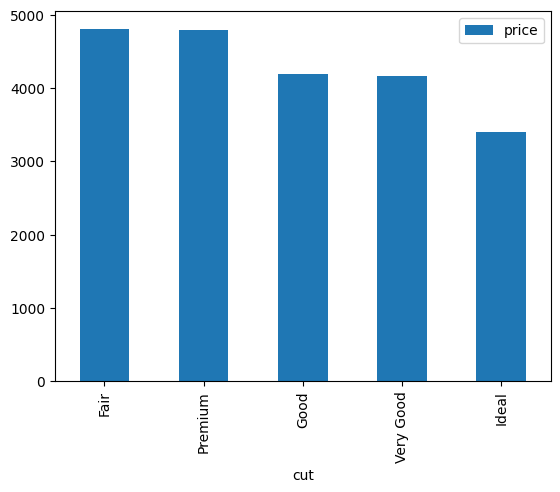

In [48]:
b.plot(kind="bar")